In [116]:
import astra
import numpy as np
import matplotlib.pyplot as plt

In [117]:
detector_size = np.array([256, 256])
thetas = np.linspace(0, np.pi, 60, endpoint=False)  

detector_spacing = 1.0
proj_geom = astra.create_proj_geom('parallel', detector_spacing, detector_size[0], thetas)
vol_geom = astra.create_vol_geom(detector_size[0], detector_size[1])
proj_id = astra.create_projector('linear', proj_geom, vol_geom)


shepp_id, shepp_img = astra.data2d.shepp_logan(vol_geom)
sinogram_id, sinogram = astra.create_sino(shepp_img, proj_id)

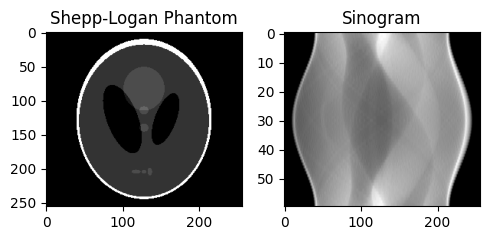

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2.5))

# Plot the Shepp-Logan phantom image
axes[0].imshow(shepp_img, cmap='gray', aspect='auto')
axes[0].set_title('Shepp-Logan Phantom')

# Plot the sinogram
axes[1].imshow(sinogram, cmap='gray', aspect='auto')
axes[1].set_title('Sinogram')

plt.tight_layout()
plt.show()


In [119]:
recon_id = astra.data2d.create('-vol', vol_geom, 0)
cfg = astra.astra_dict('FBP_CUDA')
cfg['ProjectorId'] = proj_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ReconstructionDataId'] = recon_id
cfg

{'type': 'FBP_CUDA',
 'ProjectorId': 210,
 'ProjectionDataId': 213,
 'ReconstructionDataId': 215}

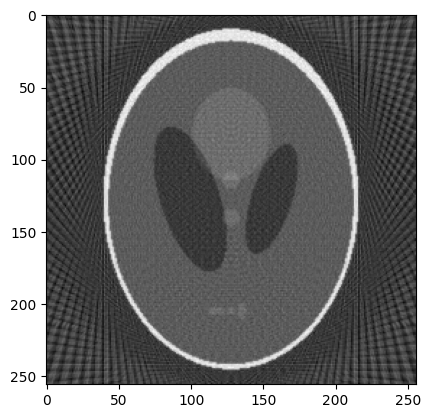

In [120]:
fbp_id = astra.algorithm.create(cfg)
astra.algorithm.run(fbp_id)
reconstruction = astra.data2d.get(recon_id)
plt.gray()
plt.imshow(reconstruction)
plt.show()

In [121]:
astra.data2d.delete([sinogram_id, recon_id])
astra.projector.delete(proj_id)
astra.algorithm.delete(fbp_id)